## Text Analytics - MsC Data Science (part time) 24' | 3rd Assignement

| Name      | CV |
|-----------|-----|
| Τριάντης Γεώργιος      | p3352303  |
| Μπαλτάς Ιωάννης     | p3352307 |
| Πλυμένος Παπαγέωργας Ιάσων   | p3352327  |
| Νίτσος Θεοφάνης   | p3352325  |


# Part-of-Speech Tagger Development Project

## Objective
Develop a part-of-speech (POS) tagger for one of the languages of the Universal Dependencies treebanks using an MLP (Multi-Layer Perceptron) operating on windows of words.

## Implementation Details
- **Algorithm**: MLP
- **Framework**: Keras/TensorFlow or PyTorch
- **Features**: Word embeddings (pre-trained)
- **Training, Development, and Test Subsets**: Separate subsets used
- **Hyper-parameter Tuning**: Tuned on the development subset
- **Monitoring Performance**: Performance on the development subset used to decide epochs

## Experimental Results
- **Baseline**: Tags each word with the most frequent tag it had in the training data
  - For unseen words, the baseline returns the most frequent tag over all words in the training data.

### Included in the Report
1. **Loss Curves**: Showing loss on training and development data across epochs.
   (See slide 49)

2. **Performance Metrics**:
   - Precision, recall, F1, precision-recall AUC scores for each class (tag) and classifier.
   - Separately evaluated for the training, development, and test subsets.
   
3. **Macro-Averaged Metrics**:
   - Macro-averaged precision, recall, F1, precision-recall AUC scores.
   - Averaged over classes for each classifier and evaluated separately for the training, development, and test subsets.

## Methodology and Datasets
- **Datasets Statistics**:
  - Average sentence length, number of training/dev/test sentences and words, vocabulary size.
- **Preprocessing Steps**:
  - Description of preprocessing steps performed.

For more details, refer to the report.

For frameworks:
- [Keras](http://keras.io/)
- [TensorFlow](https://www.tensorflow.org/)
- [PyTorch](http://pytorch.org/)



### Based on universal dependencies

Alphabetical listing:

- **ADJ**: adjective
- **ADP**: adposition
- **ADV**: adverb
- **AUX**: auxiliary
- **CCONJ**: coordinating conjunction
- **DET**: determiner
- **INTJ**: interjection
- **NOUN**: noun
- **NUM**: numeral
- **PART**: particle
- **PRON**: pronoun
- **PROPN**: proper noun
- **PUNCT**: punctuation
- **SCONJ**: subordinating conjunction
- **SYM**: symbol
- **VERB**: verb
- **X**: other


## Installing required libraries

- pyconll, a low level wrapper around the CoNLL-U format.
- fasttext, a library of the selected pretrained tokenizer model

In [ ]:
! pip install google
!pip install pyconll
!pip install fasttext-wheel
!pip install torchsummary

## Downloading the Universal Dependencies treebanks dataset

In [ ]:
from transformers import AutoTokenizer, AutoModel
import os
import torch
import numpy as np
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
print(IN_COLAB)


greek_pretrained_model_path = 'wiki.el.bin'
if IN_COLAB:
    !apt-get install wget
    !wget -O ud-treebanks-v2.13.tgz https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-5287/ud-treebanks-v2.13.tgz?sequence=1&isAllowed=y
    !tar -xvf  'ud-treebanks-v2.13.tgz'
    local_dir = 'ud-treebanks-v2.13/UD_Greek-GUD/el_gud-ud-train.conllu'

    !wget -O wiki.el.zip https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.el.zip
    # Unzip the file
    import zipfile
    with zipfile.ZipFile("wiki.el.zip", 'r') as zip_ref:
      zip_ref.extractall("/content/")
else:

    local_dir = os.getcwd() + '\\data\\UD_Greek-GUD\\el_gud-ud-train.conllu'

print(local_dir)

False
c:\Users\jason\Documents\coding_repos\aueb_ds_24_text_analytics\assignment_2\data\UD_Greek-GUD\el_gud-ud-train.conllu


### Selection of a pre trained word embedding model

- Facebook's fasttext was selected, a pre-trained word vectors for 157 languages, trained on Common Crawl and Wikipedia.
- We download the pretrained tokenizer model for the Greek language. [here] (https://fasttext.cc/docs/en/pretrained-vectors.html)
- We can reduce the dimensionality if  it is our intention



In [ ]:
reduce_dim = None # 100
import fasttext.util
ft = fasttext.load_model('wiki.el.bin')

if reduce_dim:
    fasttext.util.reduce_model(ft, 100)

ft.get_dimension()

300

In [ ]:
test_word = 'γεια'
embedding = ft.get_word_vector(test_word)
print('word embeding: ', embedding)
print('Shape: ', embedding.shape)
print('Datatype: ', type(embedding))

word embeding:  [-2.01471373e-01 -8.19069967e-02 -6.30714357e-01  2.38028705e-01
  1.61352232e-01 -8.11730027e-02 -2.05985248e-01 -2.46288344e-01
  5.96133694e-02  3.13241690e-01  3.22496504e-01  2.58694142e-01
  1.99632481e-01  8.49099040e-01 -2.67637640e-01  1.09031834e-01
 -3.11452687e-01 -1.06538177e-01 -1.31129831e-01  1.24932252e-01
  4.69173700e-01  3.44497800e-01  2.88675010e-01 -3.31103563e-01
  5.76218724e-01 -5.36351018e-02 -1.93529874e-01  2.41987929e-01
  2.48569950e-01  2.41300315e-01 -1.72507957e-01  3.42797726e-01
 -1.35118723e-01 -1.63847357e-01 -1.06282175e-01 -3.98298241e-02
  1.52835688e-02 -2.01351345e-01  1.09172486e-01  2.81961143e-01
 -7.34199211e-03  3.00695121e-01  2.56839078e-02  1.65734693e-01
 -2.66208798e-01  4.67981130e-01 -9.00609195e-02  4.80905294e-01
  7.41786361e-01 -4.58357424e-01  5.10946214e-02 -1.52716622e-01
  1.78740844e-02  4.78239328e-01  8.06253552e-01  1.49014872e-02
 -1.89630315e-01 -3.26926708e-01 -3.95542413e-01  1.00748032e-01
 -4.40441

### We check that the model has embedded "close" words together

In [ ]:
ft.get_nearest_neighbors('για',k=20)

[(0.5487291812896729, 'και'),
 (0.5428105592727661, 'επίσης,'),
 (0.5265333652496338, 'να'),
 (0.5225803852081299, 'προκειμένου'),
 (0.5152628421783447, 'σκοπό'),
 (0.5148484706878662, 'αλλά'),
 (0.5075995922088623, 'καθώς'),
 (0.506814181804657, '–για'),
 (0.4949963688850403, 'την'),
 (0.4937067925930023, 'σe'),
 (0.4928421080112457, 'που'),
 (0.4921763837337494, 'φτφ/nfgr'),
 (0.490660160779953, 'αυτός/ή'),
 (0.4868979752063751, 'χρησιμεύοντας'),
 (0.4801228940486908, '•\xa0\xa0'),
 (0.4787537157535553, 'όμως'),
 (0.4763149917125702, 'όμως,'),
 (0.4758837819099426, ',επίσης'),
 (0.47420328855514526, 'χρειαζόνταν'),
 (0.4724831283092499, 'επίσης')]

In [ ]:
# Iterate over vocabulary to find the most similar word
best_similarity = -1
best_word = None

for word in ft.get_words():
    word_embedding = ft.get_word_vector(word)
    similarity = np.dot(embedding, word_embedding) / (np.linalg.norm(embedding) * np.linalg.norm(word_embedding))
    if similarity > best_similarity:
        best_similarity = similarity
        best_word = word

print('Original word:', test_word)
print('Most similar word:', best_word)
print('Cosine similarity:', best_similarity)

Original word: γεια
Most similar word: γεια
Cosine similarity: 1.0


## Utilzing the fasttext model to create the datasets to be used in the MLP

In [ ]:
import pyconll

# Step 1: Read CoNLL-U formatted file
def read_dataset(file_path, limit_sentences=None):

    # Loading the file
    data = pyconll.load_from_file(file_path)
    sentences = []

    data_to_load = data[0:limit_sentences] if limit_sentences is not None else data
    # Iterating over each sentence
    for sentence in data_to_load:
        # Spliting the sentence to words
        words = [token.form for token in sentence]


        # Retrieving the POS of each words (Y)
        tags = [token.upos for token in sentence]

        # Saving for each data point of the dataset
        sentences.append({'words': words, 'tags': tags})
    return sentences

In [ ]:
# Step 1: Read data
data = read_dataset(local_dir)
print(len(data))
data

1071


[{'words': ['Τον',
   'διαβεβαιώνω',
   'ότι',
   'δεν',
   'πρόκειται',
   'να',
   'δημοσιοποιηθεί',
   'από',
   'τη',
   'δική',
   'μας',
   'υπηρεσία',
   'και',
   'κλείνουμε',
   '.'],
  'tags': ['PRON',
   'VERB',
   'SCONJ',
   'PART',
   'VERB',
   'SCONJ',
   'VERB',
   'ADP',
   'DET',
   'ADJ',
   'PRON',
   'NOUN',
   'CCONJ',
   'VERB',
   'PUNCT']},
 {'words': ['Τη', 'ρωτάω', 'πάλι', '.'],
  'tags': ['PRON', 'VERB', 'ADV', 'PUNCT']},
 {'words': ['Όσο',
   'και',
   'αν',
   'χαίρομαι',
   'που',
   'βλέπω',
   'την',
   'κόρη',
   'μου',
   'με',
   'τον',
   'Φάνη',
   'και',
   'τη',
   'Μάνια',
   'με',
   'τον',
   'Ούλι',
   ',',
   'η',
   'πρώτη',
   'μου',
   'αντίδραση',
   'είναι',
   'να',
   'τους',
   'πω',
   '«',
   'καληνύχτα',
   '»',
   'και',
   'να',
   'πάω',
   'για',
   'ύπνο',
   '.'],
  'tags': ['ADV',
   'CCONJ',
   'SCONJ',
   'VERB',
   'SCONJ',
   'VERB',
   'DET',
   'NOUN',
   'PRON',
   'ADP',
   'DET',
   'PROPN',
   'CCONJ',
   'DET',


In [ ]:
def create_input_windows_from_sentence(sentence: list, tags: list, window_size: int = 4):
  """Define the split the window"""
  input_windows = []
  for i in range(len(sentence) - window_size + 1):
    # Create the window
    window = sentence[i:i+window_size]

    vectorized_window = [ft.get_word_vector(word) for word in window]

    input_windows.append({'original_data': window,
                          'vectorized_data': vectorized_window,
                          'class': tags[i+window_size-1]})
  return input_windows

In [ ]:
test_one = create_input_windows_from_sentence(sentence=data[0]['words'], tags=data[0]['tags'], window_size=4)

In [ ]:
test_one[0]

{'original_data': ['Τον', 'διαβεβαιώνω', 'ότι', 'δεν'],
 'vectorized_data': [array([-8.75070691e-03,  4.36865464e-02, -4.25346732e-01, -8.03080723e-02,
         -1.89689919e-01, -2.52161652e-01,  3.56036127e-01,  7.00473636e-02,
         -3.64488691e-01,  1.78792834e-01, -3.68425310e-01,  5.13504505e-01,
         -1.22169904e-01, -7.69278333e-02, -9.60447490e-02,  5.12755036e-01,
         -1.03704773e-01,  9.37386677e-02, -7.88162276e-02,  1.39081195e-01,
          7.02370927e-02, -4.55486953e-01, -1.84168071e-01,  2.40114536e-02,
         -4.51070786e-01,  1.05972942e-02,  5.13632111e-02,  8.84165764e-02,
          1.01211265e-01,  4.28049505e-01,  1.96067795e-01, -3.43128368e-02,
          2.59724826e-01,  1.33374617e-01,  1.59623176e-01,  5.28588414e-01,
          1.64925694e-01, -4.25447077e-01,  9.72185358e-02, -1.81543022e-01,
          1.53635561e-01, -4.33998853e-02,  4.51637916e-02,  4.23517764e-01,
         -4.26549911e-01,  4.91526008e-01,  1.96138471e-01, -1.71246827e-02,
 

In [ ]:
[x['original_data'] for x in test_one]

[['Τον', 'διαβεβαιώνω', 'ότι', 'δεν'],
 ['διαβεβαιώνω', 'ότι', 'δεν', 'πρόκειται'],
 ['ότι', 'δεν', 'πρόκειται', 'να'],
 ['δεν', 'πρόκειται', 'να', 'δημοσιοποιηθεί'],
 ['πρόκειται', 'να', 'δημοσιοποιηθεί', 'από'],
 ['να', 'δημοσιοποιηθεί', 'από', 'τη'],
 ['δημοσιοποιηθεί', 'από', 'τη', 'δική'],
 ['από', 'τη', 'δική', 'μας'],
 ['τη', 'δική', 'μας', 'υπηρεσία'],
 ['δική', 'μας', 'υπηρεσία', 'και'],
 ['μας', 'υπηρεσία', 'και', 'κλείνουμε'],
 ['υπηρεσία', 'και', 'κλείνουμε', '.']]

In [ ]:
test_one[0]['vectorized_data'][0].shape

(300,)

In [ ]:
from tqdm import tqdm
window_size = 3
dataset = []
for sentence in tqdm(data):
    data_set_to_use = create_input_windows_from_sentence(sentence=sentence['words'], tags=sentence['tags'], window_size=window_size)
    dataset.extend(data_set_to_use)

len(dataset)

  0%|          | 0/1071 [00:00<?, ?it/s]

100%|██████████| 1071/1071 [00:00<00:00, 3716.78it/s]


12719

In [ ]:
example_index = 2
dataset[example_index]['original_data'], dataset[example_index]['vectorized_data'], dataset[example_index]['class']

(['ότι', 'δεν', 'πρόκειται'],
 [array([-1.63646534e-01,  2.76154131e-02, -6.88515455e-02,  1.76940009e-01,
         -2.07794756e-01,  1.08002260e-01, -8.28526765e-02, -2.19090849e-01,
         -2.78386593e-01,  2.47333899e-01, -6.94717169e-02,  2.16506980e-02,
         -3.25514860e-02,  1.48515671e-01,  1.76298514e-01,  1.72095507e-01,
          2.20042437e-01,  6.94081038e-02, -2.21137643e-01,  3.37795764e-01,
         -5.19047305e-02,  3.52207929e-01,  2.15411782e-01, -3.09559077e-01,
          1.33250922e-01,  7.41209090e-02, -1.48017749e-01,  4.59965974e-01,
         -8.78499597e-02,  3.27948183e-02,  2.01458663e-01,  1.33232802e-01,
          3.00393581e-01, -9.18461457e-02, -1.93714678e-01,  4.97837514e-02,
          3.11656564e-01, -2.48545725e-02,  2.46843189e-01,  2.26961728e-02,
          4.38806474e-01, -6.44084737e-02, -2.04007119e-01, -2.76975393e-01,
         -1.43054932e-01,  7.87422284e-02,  2.36126035e-01, -1.74993455e-01,
         -4.19837721e-02, -1.06572524e-01, -2.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

transform_data = []
X = []
y = []
for example in dataset:
    X.append(np.concatenate(example['vectorized_data'], axis=0))
    y.append(example['class'])

# Convert strings to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# One-hot encode the integer labels
y_train_one_hot = to_categorical(y_train_encoded)

# Assuming X and Y are your separate lists
X_train, X_test, Y_train, Y_test = train_test_split(X, y_train_one_hot, train_size=0.8)



In [ ]:
X_train[0].shape

(900,)

In [ ]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(X_train), len(Y_train)

(10175, 10175)

## Verifying the urilization of gpu

In [ ]:
import torch

torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.current_device()
torch.cuda.device(0)

print(torch.cuda.device_count(), torch.cuda.current_device(), torch.cuda.get_device_name(0))

1 0 NVIDIA GeForce RTX 3090


# The classes for which we will make classifications

In [ ]:
total_classes = list(set([x['class'] for x in dataset]))
print(total_classes, len(total_classes))

['PART', 'ADP', 'SCONJ', 'ADV', 'NUM', 'CCONJ', 'VERB', 'PUNCT', 'DET', 'PRON', 'NOUN', 'ADJ', 'X', 'PROPN', 'INTJ', 'AUX'] 16


Using device: cuda
Epoch 1/10
Training Loss: 2.356081174604548, Validation Loss: 2.2848333232807665
Training Accuracy: 0.5368058968058969, Validation Accuracy: 0.5880503144654088
Training F1 Score: 0.4198156078311752, Validation F1 Score: 0.44945965656786846
Epoch 2/10
Training Loss: 2.217280402873297, Validation Loss: 2.180888313917244
Training Accuracy: 0.6608353808353808, Validation Accuracy: 0.7075471698113207
Training F1 Score: 0.5648156308086691, Validation F1 Score: 0.6291086576526986
Epoch 3/10
Training Loss: 2.118624527124489, Validation Loss: 2.1016352401589447
Training Accuracy: 0.7622604422604422, Validation Accuracy: 0.7759433962264151
Training F1 Score: 0.6929739616029295, Validation F1 Score: 0.7190740099547707
Epoch 4/10
Training Loss: 2.063849672581415, Validation Loss: 2.0828924658913284
Training Accuracy: 0.8131695331695332, Validation Accuracy: 0.7955974842767296
Training F1 Score: 0.7491377256250056, Validation F1 Score: 0.7303255459939171
Epoch 5/10
Training Loss:

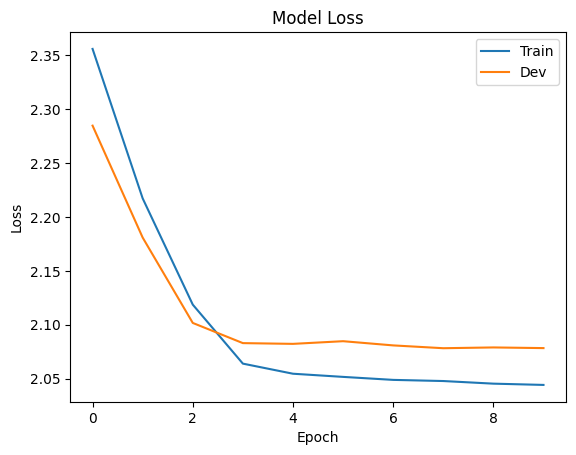

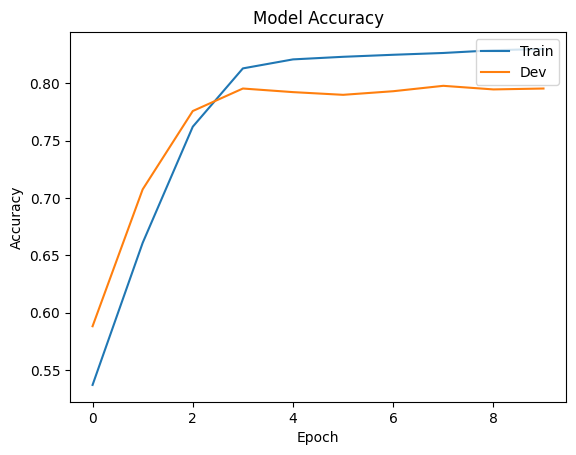

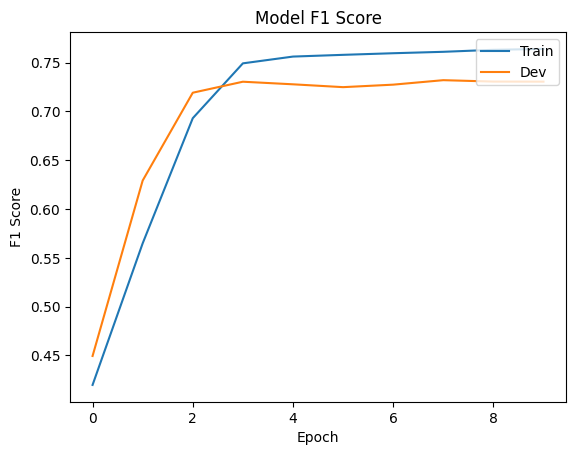

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 900]               0
            Linear-2                  [-1, 100]          90,100
              ReLU-3                  [-1, 100]               0
            Linear-4                   [-1, 50]           5,050
              ReLU-5                   [-1, 50]               0
            Linear-6                   [-1, 16]             816
           Softmax-7                   [-1, 16]               0
Total params: 95,966
Trainable params: 95,966
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.37
Estimated Total Size (MB): 0.38
----------------------------------------------------------------


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, roc_auc_score
from torchsummary import summary
import torch.nn.functional as F
from sklearn.metrics import roc_curve, auc, f1_score

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

    # 1. Curves showing the loss on training and development data as a function of epochs
    def plot_loss_curves(train_losses, dev_losses):
        plt.plot(train_losses, label='Training Loss')
        plt.plot(dev_losses, label='Development Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Curves')
        plt.legend()
        plt.show()



transform_data = []
X = []
y = []
for example in dataset:
    X.append(np.concatenate(example['vectorized_data'], axis=0))
    y.append(example['class'])


# Convert strings to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# One-hot encode the integer labels
y_train_one_hot = to_categorical(y_train_encoded)

# Assuming X and Y are your separate lists
X_train, X_rest, Y_train, Y_rest = train_test_split(X, y_train_one_hot, train_size=0.8)

# Split the rest into testing and validation sets for both X and Y
X_test, X_val, Y_test, Y_val = train_test_split(X_rest, Y_rest, test_size=0.5)


# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
# Assuming X_train, X_dev, Y_train, Y_dev are lists of NumPy arrays
X_train_tensor = torch.tensor(np.stack(X_train), dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
y_train_tensor = y_train_tensor.to(torch.float)

X_dev_tensor = torch.tensor(np.stack(X_val), dtype=torch.float32).to(device)
y_dev_tensor = torch.tensor(Y_val, dtype=torch.long).to(device)
y_dev_tensor = y_dev_tensor.to(torch.float)
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

dev_dataset = TensorDataset(X_dev_tensor, y_dev_tensor)
dev_loader = DataLoader(dev_dataset, batch_size=32, shuffle=False)


# Define model, loss, and optimizer
input_dim = X_train_tensor.shape[1]
hidden_dim1 = 100
hidden_dim2 = 50
output_dim = len(total_classes)
model = MLP(input_dim, hidden_dim1, hidden_dim2, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training loop with metrics tracking
train_losses = []
dev_losses = []
train_accuracies = []
dev_accuracies = []
train_f1_scores = []
dev_f1_scores = []
train_aucs = []

num_epochs = 10
for epoch in range(num_epochs):
    epoch_train_losses = []  # Store losses for this epoch
    model.train()
    train_preds = []
    train_labels = []
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_train_losses.append(loss.item())  # Append loss for this batch

        _, predicted = torch.max(outputs, 1)
        train_preds.extend(predicted.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    # Calculate average loss for this epoch
    epoch_loss = np.mean(epoch_train_losses)
    train_losses.append(epoch_loss)

    # Convert one-hot encoded labels to indices
    train_labels_corrected = np.argmax(train_labels, axis=1)

    # Calculate additional metrics for training data
    train_accuracy = np.mean(train_preds == train_labels_corrected)
    train_f1 = f1_score(train_labels_corrected, train_preds, average='weighted')

    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)

    # Evaluate on development data
    model.eval()  # Set the model to evaluation mode
    dev_loss = 0.0
    dev_preds = []
    dev_labels = []
    dev_probs = []  # To store predicted probabilities
    with torch.no_grad():
        for inputs, labels in dev_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            dev_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            dev_preds.extend(predicted.cpu().numpy())
            dev_labels.extend(labels.cpu().numpy())
            dev_probs.extend(F.softmax(outputs, dim=1)[:, 1].cpu().numpy())  # Get probability of positive class

    dev_loss /= len(dev_loader.dataset)
    dev_losses.append(dev_loss)

    # Convert one-hot encoded labels to indices
    dev_labels_corrected = np.argmax(dev_labels, axis=1)
    # Calculate additional metrics for validation data
    dev_accuracy = np.mean(dev_preds == dev_labels_corrected)
    dev_f1 = f1_score(dev_labels_corrected, dev_preds, average='weighted')

    dev_accuracies.append(dev_accuracy)
    dev_f1_scores.append(dev_f1)

    print(f"Epoch {epoch+1}/{num_epochs}")
    # Print the losses and metrics after each epoch
    print(f"Training Loss: {train_losses[-1]}, Validation Loss: {dev_losses[-1]}")
    print(f"Training Accuracy: {train_accuracies[-1]}, Validation Accuracy: {dev_accuracies[-1]}")
    print(f"Training F1 Score: {train_f1_scores[-1]}, Validation F1 Score: {dev_f1_scores[-1]}")


# Plotting the metrics
def plot_metrics(train_metric, val_metric, title, ylabel):
    plt.plot(train_metric)
    plt.plot(val_metric)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Dev'], loc='upper right')
    plt.show()

plot_metrics(train_losses, dev_losses, 'Model Loss', 'Loss')
plot_metrics(train_accuracies, dev_accuracies, 'Model Accuracy', 'Accuracy')
plot_metrics(train_f1_scores, dev_f1_scores, 'Model F1 Score', 'F1 Score')


summary(model.to(device), (1, input_dim))  # Adjust the input shape if needed


In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_test and Y_test are your test dataset
X_test_tensor = torch.tensor(np.stack(X_test), dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).to(device)

# Create DataLoader for test dataset
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate on test data
model.eval()  # Set the model to evaluation mode
test_loss = 0.0
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)  # Get the index of the class with the highest probability
        predictions.extend(predicted.cpu().numpy())  # Append predictions
        true_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())  # Append true labels

test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss}")

# Convert predictions and true labels to numpy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Calculate accuracy
accuracy = np.mean(predictions == true_labels)
print(f"Test Accuracy: {accuracy}")


Test Loss: 1.9741109377183255
Test Accuracy: 0.89937106918239


# Loading the model so that we can find the vectors of a given word

In [ ]:
from gensim.models.fasttext import load_facebook_vectors
wv = load_facebook_vectors('wiki.el.bin')


In [ ]:

example_index = 5
example_test_data_point = X_test[example_index]

print(example_test_data_point.shape)
np.array_split(example_test_data_point, window_size)
print([word.shape for word in np.array_split(example_test_data_point, window_size)])
print([wv.similar_by_vector(word)[0][0] for word in np.array_split(example_test_data_point, window_size)])
print('class to predict: ', label_encoder.inverse_transform([np.argmax(Y_test[example_index])]))
print('predicted class: ', label_encoder.inverse_transform([predictions[example_index]]))

(900,)
[(300,), (300,), (300,)]
['κρατάει', 'σ', 'τα']
class to predict:  ['DET']
predicted class:  ['DET']


### Now we will attempt to optimize the model further

Epoch 1/50
Training Loss: 2.475437529431949, Validation Loss: 2.5889354981716326
Training Accuracy: 0.8301719901719902, Validation Accuracy: 0.28537735849056606
Training F1 Score: 0.7639162302902548, Validation F1 Score: 0.182131399764571
Epoch 2/50
Training Loss: 2.5043575973630703, Validation Loss: 2.5689493485216826
Training Accuracy: 0.8301719901719902, Validation Accuracy: 0.3058176100628931
Training F1 Score: 0.7639162302902548, Validation F1 Score: 0.19735878271164378
Epoch 3/50
Training Loss: 2.4481636060858674, Validation Loss: 2.441361610244655
Training Accuracy: 0.8301719901719902, Validation Accuracy: 0.4331761006289308
Training F1 Score: 0.7639162302902548, Validation F1 Score: 0.2885566256477722
Epoch 4/50
Training Loss: 2.4818544207878834, Validation Loss: 2.5664209719723874
Training Accuracy: 0.8301719901719902, Validation Accuracy: 0.3081761006289308
Training F1 Score: 0.7639162302902548, Validation F1 Score: 0.18739132311293918
Epoch 5/50
Training Loss: 2.529959171073

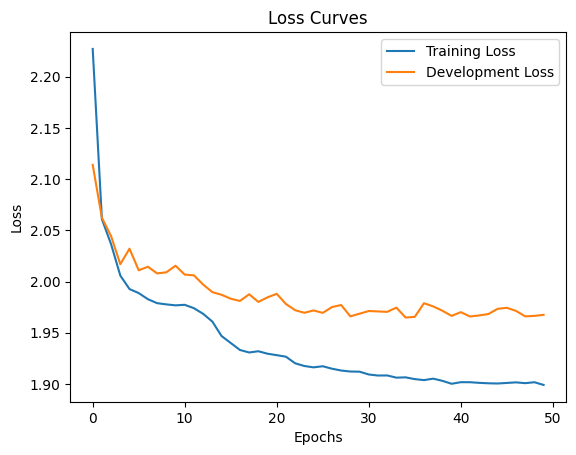

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate, use_layer_norm):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(dropout_rate)
        self.use_layer_norm = use_layer_norm
        if use_layer_norm:
            self.layer_norm1 = nn.LayerNorm(hidden_dim1)
            self.layer_norm2 = nn.LayerNorm(hidden_dim2)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        if self.use_layer_norm:
            x = self.layer_norm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        if self.use_layer_norm:
            x = self.layer_norm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Define a function for training and evaluation
def train_and_evaluate_model(no_of_epochs, hidden_dim1, hidden_dim2, learning_rate, dropout_rate, use_layer_norm, X_train, Y_train, X_dev, Y_dev):
    # Move data to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float).to(device)
    X_dev_tensor = torch.tensor(X_dev, dtype=torch.float32).to(device)
    Y_dev_tensor = torch.tensor(Y_dev, dtype=torch.float).to(device)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    dev_dataset = TensorDataset(X_dev_tensor, Y_dev_tensor)
    dev_loader = DataLoader(dev_dataset, batch_size=32, shuffle=False)

    # Define model, loss, and optimizer
    input_dim = X_train_tensor.shape[1]
    output_dim = Y_train_tensor.shape[1]
    model = MLP(input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate, use_layer_norm).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop with metrics tracking
    train_losses = []
    dev_losses = []
    train_accuracies = []
    dev_accuracies = []
    train_f1_scores = []
    dev_f1_scores = []

    for epoch in range(no_of_epochs):
        epoch_train_losses = []  # Store losses for this epoch
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_train_losses.append(loss.item())  # Append loss for this batch

        # Calculate average loss for this epoch
        epoch_loss = np.mean(epoch_train_losses)
        train_losses.append(epoch_loss)
        train_f1 = f1_score(train_labels_corrected, train_preds, average='weighted')

        train_accuracies.append(train_accuracy)
        train_f1_scores.append(train_f1)

        # Evaluate on development data
        model.eval()  # Set the model to evaluation mode
        dev_loss = 0.0
        dev_preds = []
        dev_labels = []
        dev_probs = []  # To store predicted probabilities
        with torch.no_grad():
            dev_loss = 0.0
            for inputs, labels in dev_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                dev_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                dev_preds.extend(predicted.cpu().numpy())
                dev_labels.extend(labels.cpu().numpy())
                dev_probs.extend(F.softmax(outputs, dim=1)[:, 1].cpu().numpy())  # Get probability of positive class
        dev_loss /= len(dev_loader.dataset)
        dev_losses.append(dev_loss)

        # Convert one-hot encoded labels to indices
        dev_labels_corrected = np.argmax(dev_labels, axis=1)
        # Calculate additional metrics for validation data
        dev_accuracy = np.mean(dev_preds == dev_labels_corrected)
        dev_f1 = f1_score(dev_labels_corrected, dev_preds, average='weighted')

        dev_accuracies.append(dev_accuracy)
        dev_f1_scores.append(dev_f1)

        print(f"Epoch {epoch+1}/{no_of_epochs}")
        # Print the losses and metrics after each epoch
        print(f"Training Loss: {train_losses[-1]}, Validation Loss: {dev_losses[-1]}")
        print(f"Training Accuracy: {train_accuracies[-1]}, Validation Accuracy: {dev_accuracies[-1]}")
        print(f"Training F1 Score: {train_f1_scores[-1]}, Validation F1 Score: {dev_f1_scores[-1]}")
    return train_losses, dev_losses, train_accuracies, dev_accuracies, train_f1_scores, dev_f1_scores

import pandas as pd

# Create an empty DataFrame to store results
results_df = []

# Randomized search for hyperparameters
num_iterations = 20
no_of_epochs = 50
hidden_dim1_values = [50, 100, 200, 500]
hidden_dim2_values = [25, 50, 100]
learning_rate_values = [0.001, 0.01, 0.1]
dropout_rate_values = [0.1, 0.2, 0.3]
use_layer_norm_values = [True, False]

best_model = None
best_dev_loss = float('inf')

for i in range(num_iterations):
    # Randomly sample hyperparameters
    hidden_dim1 = np.random.choice(hidden_dim1_values)
    hidden_dim2 = np.random.choice(hidden_dim2_values)
    learning_rate = np.random.choice(learning_rate_values)
    dropout_rate = np.random.choice(dropout_rate_values)
    use_layer_norm = np.random.choice(use_layer_norm_values)

    # Train and evaluate model
    train_losses, dev_losses, train_accuracies, dev_accuracies, train_f1_scores, dev_f1_scores = train_and_evaluate_model(no_of_epochs, hidden_dim1, hidden_dim2, learning_rate, dropout_rate, use_layer_norm, X_train, Y_train, X_val, Y_val)

    # Get the final development loss
    final_dev_loss = dev_losses[-1]

    # Append results to DataFrame
    results_df.append({'Iteration': i+1,
                                    'Hidden Dim 1': hidden_dim1,
                                    'Hidden Dim 2': hidden_dim2,
                                    'Learning Rate': learning_rate,
                                    'Dropout Rate': dropout_rate,
                                    'Layer Norm': use_layer_norm,
                                    'Final Dev Loss': final_dev_loss})

    # Print the results
    print(f"Iteration {i+1}: Hidden Dim 1 = {hidden_dim1}, Hidden Dim 2 = {hidden_dim2}, Learning Rate = {learning_rate}, Dropout Rate = {dropout_rate}, Layer Norm = {use_layer_norm}, Final Dev Loss = {final_dev_loss}")

    # Update best model if necessary
    if final_dev_loss < best_dev_loss:
        best_dev_loss = final_dev_loss
        best_model = (hidden_dim1, hidden_dim2, learning_rate, dropout_rate, use_layer_norm, train_losses, dev_losses)

# Plot the loss curves of the best model
best_hidden_dim1, best_hidden_dim2, best_learning_rate, best_dropout_rate, best_use_layer_norm, best_train_losses, best_dev_losses = best_model
print(f"Best Model: Hidden Dim 1 = {best_hidden_dim1}, Hidden Dim 2 = {best_hidden_dim2}, Learning Rate = {best_learning_rate}, Dropout Rate = {best_dropout_rate}, Layer Norm = {best_use_layer_norm}, Best Dev Loss = {best_dev_loss}")
plt.plot(best_train_losses, label='Training Loss')
plt.plot(best_dev_losses, label='Development Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()


In [ ]:
pd.DataFrame.from_records(results_df)

,Iteration,Hidden Dim 1,Hidden Dim 2,Learning Rate,Dropout Rate,Layer Norm,Final Dev Loss
0,1,500,100,0.010,0.1,False,2.446924
1,2,50,25,0.100,0.1,False,2.732301
2,3,500,50,0.001,0.1,False,1.995966
3,4,500,50,0.001,0.1,True,1.967527
4,5,100,50,0.010,0.1,False,2.102447
5,6,50,100,0.100,0.1,False,2.732301
6,7,50,25,0.010,0.1,False,2.099418
7,8,50,25,0.010,0.3,False,2.086848
8,9,500,50,0.010,0.3,True,2.058156
9,10,100,50,0.010,0.2,True,2.029468


Epoch 1/200
Training Loss: 2.242348371061889, Validation Loss: 2.106979595040375
Training Accuracy: 0.8301719901719902, Validation Accuracy: 0.779874213836478
Training F1 Score: 0.7639162302902548, Validation F1 Score: 0.7144481277691177
Epoch 2/200
Training Loss: 2.076497215519911, Validation Loss: 2.0820758792589293
Training Accuracy: 0.8301719901719902, Validation Accuracy: 0.7932389937106918
Training F1 Score: 0.7639162302902548, Validation F1 Score: 0.7264521930150707
Epoch 3/200
Training Loss: 2.059794455579242, Validation Loss: 2.0720803317783765
Training Accuracy: 0.8301719901719902, Validation Accuracy: 0.8073899371069182
Training F1 Score: 0.7639162302902548, Validation F1 Score: 0.7583191768125219
Epoch 4/200
Training Loss: 2.0359193630188517, Validation Loss: 2.04027218638726
Training Accuracy: 0.8301719901719902, Validation Accuracy: 0.8372641509433962
Training F1 Score: 0.7639162302902548, Validation F1 Score: 0.7908790186991187
Epoch 5/200
Training Loss: 2.02186729660574

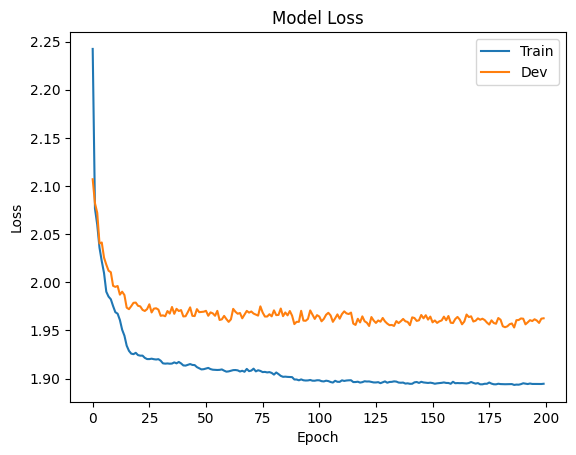

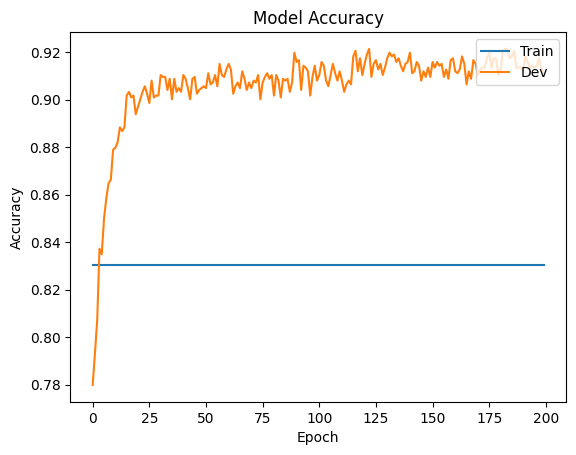

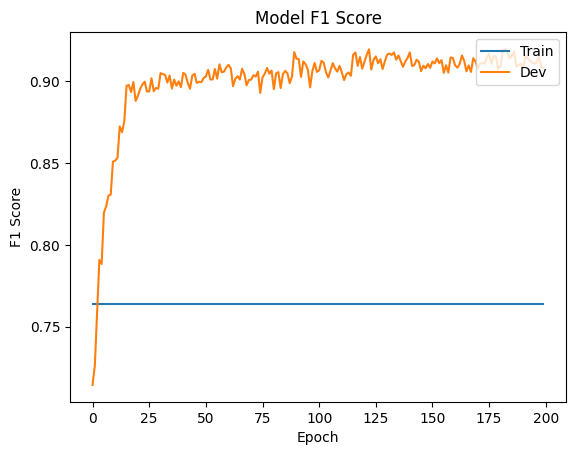

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 900]               0
            Linear-2                  [-1, 100]          90,100
              ReLU-3                  [-1, 100]               0
            Linear-4                   [-1, 50]           5,050
              ReLU-5                   [-1, 50]               0
            Linear-6                   [-1, 16]             816
           Softmax-7                   [-1, 16]               0
Total params: 95,966
Trainable params: 95,966
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.37
Estimated Total Size (MB): 0.38
----------------------------------------------------------------


In [ ]:
# Retrain the best model for 200 epochs
best_hidden_dim1, best_hidden_dim2, best_learning_rate, best_dropout_rate, best_use_layer_norm, _, _ = best_model

final_train_losses, final_dev_losses, final_train_accuracies, final_dev_accuracies, final_train_f1_scores, final_dev_f1_scores = train_and_evaluate_model(200,
    best_hidden_dim1, best_hidden_dim2, best_learning_rate, best_dropout_rate, best_use_layer_norm,
    X_train, Y_train, X_val, Y_val)

plot_metrics(final_train_losses, final_dev_losses, 'Model Loss', 'Loss')
plot_metrics(final_train_accuracies, final_dev_accuracies, 'Model Accuracy', 'Accuracy')
plot_metrics(final_train_f1_scores, final_dev_f1_scores, 'Model F1 Score', 'F1 Score')


summary(model.to(device), (1, input_dim))  # Adjust the input shape if needed